In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
# import gradio as gr# data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
train=pd.read_csv('C:/Users/SHAURYA/Downloads/Lol/train.csv')
TRAIN=train.filter(['LotArea','OverallCond','TotalBsmtSF','1stFlrSF','2ndFlrSF','BedroomAbvGr','GarageArea','PoolArea','MoSold','YrSold','SalePrice'],axis=1)
# TEST=pd.read_csv("/kaggle/input/houseprice/test.csv")'Condition1','KitchenQual','Bldgtype','HouseStyle','Id','OverallQual',
# print(TEST.info())
test=pd.read_csv('C:/Users/SHAURYA/Downloads/Lol/test.csv')
TEST=train.filter(['Id','LotArea','Condition1','OverallQual','OverallCond','Utilities','Bldgtype','HouseStyle','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF','KitchenQual','BedroomAbvGr','KitchenAbvGr','GarageArea','PoolArea','MoSold','YrSold','SaleType','SalePrice'],axis=1)
print(TEST.info())
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   LotArea       1460 non-null   int64 
 2   Condition1    1460 non-null   object
 3   OverallQual   1460 non-null   int64 
 4   OverallCond   1460 non-null   int64 
 5   Utilities     1460 non-null   object
 6   HouseStyle    1460 non-null   object
 7   TotalBsmtSF   1460 non-null   int64 
 8   HeatingQC     1460 non-null   object
 9   CentralAir    1460 non-null   object
 10  1stFlrSF      1460 non-null   int64 
 11  2ndFlrSF      1460 non-null   int64 
 12  KitchenQual   1460 non-null   object
 13  BedroomAbvGr  1460 non-null   int64 
 14  KitchenAbvGr  1460 non-null   int64 
 15  GarageArea    1460 non-null   int64 
 16  PoolArea      1460 non-null   int64 
 17  MoSold        1460 non-null   int64 
 18  YrSold        1460 non-null   int64 
 19  SaleTy

In [3]:
# Get the list of categorical columns in the dataframe
categorical_columns = TRAIN.select_dtypes(include=['object', 'category']).columns

# For each categorical column, use the get_dummies() method to create a new dataframe with one-hot encoded columns
for column in categorical_columns:
    TRAIN = pd.concat([TRAIN, pd.get_dummies(TRAIN[column])], axis=1)
object_cols = TRAIN.select_dtypes(include=['object']).columns
TRAIN = TRAIN.drop(object_cols, axis=1)
TRAIN = TRAIN.replace(True, 1)
TRAIN = TRAIN.replace(False, 0)
categorical_columns = TEST.select_dtypes(include=['object', 'category']).columns
for column in categorical_columns:
    TEST = pd.concat([TEST, pd.get_dummies(TEST[column])], axis=1)
object_cols = TEST.select_dtypes(include=['object']).columns
TEST = TEST.drop(object_cols, axis=1)
TEST = TEST.replace(True, 1)
TEST = TEST.replace(False, 0)
TRAIN = TRAIN.astype(float)
TEST = TEST.astype(float)
# print(TEST.info())
# TRAIN=TRAIN['SalePrice'].shift(-1)
# s = TRAIN.pop('SalePrice')
# TRAIN = pd.concat([TRAIN, s])
# Return the resulting dataframe
print(TRAIN.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   float64
 1   OverallCond   1460 non-null   float64
 2   TotalBsmtSF   1460 non-null   float64
 3   1stFlrSF      1460 non-null   float64
 4   2ndFlrSF      1460 non-null   float64
 5   BedroomAbvGr  1460 non-null   float64
 6   GarageArea    1460 non-null   float64
 7   PoolArea      1460 non-null   float64
 8   MoSold        1460 non-null   float64
 9   YrSold        1460 non-null   float64
 10  SalePrice     1460 non-null   float64
dtypes: float64(11)
memory usage: 125.6 KB
None


In [4]:

# shape of the dataset
print('Shape of training data :',TRAIN.shape)
from sklearn.model_selection import train_test_split
train , test = train_test_split(TRAIN, test_size = 0.25)

x_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
x_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']
print(x_test)



x_test = x_test.fillna(0)
x_train = x_train.fillna(0)

Shape of training data : (1460, 11)
      LotArea  OverallCond  TotalBsmtSF  1stFlrSF  2ndFlrSF  BedroomAbvGr  \
132    7388.0          6.0       1063.0    1327.0       0.0           3.0   
758    2280.0          5.0        744.0     757.0     744.0           3.0   
980   12122.0          9.0        944.0     999.0       0.0           3.0   
989    8125.0          5.0        770.0     778.0     798.0           3.0   
470    6820.0          5.0       1488.0    1502.0       0.0           1.0   
...       ...          ...          ...       ...       ...           ...   
179    8520.0          6.0        968.0     968.0       0.0           2.0   
22     9742.0          5.0       1777.0    1795.0       0.0           3.0   
1364   3180.0          5.0        600.0     520.0     600.0           2.0   
1009   6000.0          5.0       1008.0    1008.0       0.0           4.0   
225    1680.0          5.0        630.0     630.0     672.0           3.0   

      GarageArea  PoolArea  MoSold  YrS

In [40]:



print(x_test.shape)

Id              0
LotArea         0
OverallQual     0
OverallCond     0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
KitchenAbvGr    0
GarageArea      0
PoolArea        0
MoSold          0
YrSold          0
AllPub          0
NoSeWa          0
1.5Fin          0
1.5Unf          0
1Story          0
2.5Fin          0
2.5Unf          0
2Story          0
SFoyer          0
SLvl            0
N               0
Y               0
COD             0
CWD             0
Con             0
ConLD           0
ConLI           0
ConLw           0
New             0
Oth             0
WD              0
dtype: int64
(365, 34)


In [26]:



# '''
# Create the object of the K-Nearest Neighbor model



rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

model = neighbors.KNeighborsRegressor(n_neighbors = 4)
model.fit(x_train,y_train)
print(y_train)

print(model.predict(x_train))

RMSE value for k=  1 is: 53449.06397609361
RMSE value for k=  2 is: 45760.52990914499
RMSE value for k=  3 is: 43401.56407055128
RMSE value for k=  4 is: 42705.36395366993
RMSE value for k=  5 is: 41903.03266933222
RMSE value for k=  6 is: 41425.421520212934
RMSE value for k=  7 is: 41502.52392587983
RMSE value for k=  8 is: 41248.73115176939
RMSE value for k=  9 is: 41277.33149375195
RMSE value for k=  10 is: 40807.77670410249
RMSE value for k=  11 is: 41116.74872954104
RMSE value for k=  12 is: 41711.39198897142
RMSE value for k=  13 is: 42369.53283393073
RMSE value for k=  14 is: 42866.111213575576
RMSE value for k=  15 is: 42978.81348419672
RMSE value for k=  16 is: 43489.207305008946
RMSE value for k=  17 is: 43754.42393312843
RMSE value for k=  18 is: 44066.8371104997
RMSE value for k=  19 is: 44496.492487553485
RMSE value for k=  20 is: 45022.97772609575
1011    100000.0
716     159500.0
1278    237000.0
388     191000.0
920     201000.0
          ...   
855     127000.0
1372   

c:\Users\SHAURYA\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


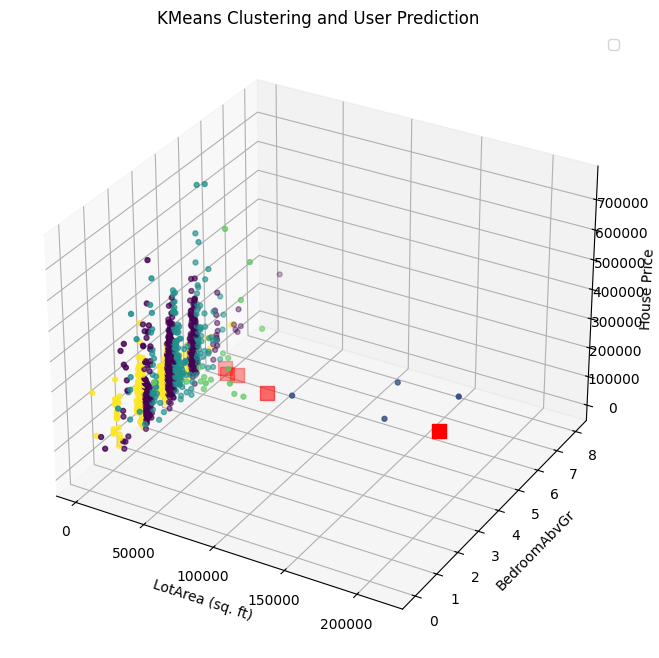

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Sample Data (replace this with your actual dataset)


# Select features for clustering
features = TRAIN.drop('SalePrice',axis=1)

# Perform KMeans clustering with 10 clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
TRAIN['Cluster'] = kmeans.fit_predict(features)

# Trained Model (replace this with your actual trained model)
# For illustration purposes, let's assume the model is a linear regression model
model = neighbors.KNeighborsRegressor(n_neighbors = 4)
model.fit(features, TRAIN['SalePrice'])

# User Input (replace this with user input)
# user_input = pd.DataFrame({
#     'OverallCond': [10],          
#     'Utilities': [4],        
#     'Ex': [1],           
#     'Y': [1],
#     'AllPub':[1]               
# })

# Predict the price using the trained model
# predicted_price = model.predict(user_input[['LotArea', 'BedroomAbvGr']])

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points with circle dots
scatter = ax.scatter(TRAIN['LotArea'], TRAIN['BedroomAbvGr'], TRAIN['SalePrice'], c=TRAIN['Cluster'], marker='.', s=50, cmap='viridis')

# Plot centroids with square dots
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='s', s=100)

# Plot user input and predicted output with brown marker
# ax.scatter(user_input['LotArea'], user_input['BedroomAbvGr'], predicted_price, c='brown', marker='o', s=100, label='User Prediction')

# Set labels for each axis
ax.set_xlabel('LotArea (sq. ft)')
ax.set_ylabel('BedroomAbvGr')
ax.set_zlabel('House Price')

# Add legend
ax.legend()

plt.title('KMeans Clustering and User Prediction')
plt.show()


In [44]:
import gradio as gr


def scatter_plot_fn():
    



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 270 entries, Id to Partial
dtypes: float64(11), int64(259)
memory usage: 3.0 MB
None


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 2.5Fin
- ClyTile
- Floor
- Membran
- Metal
- ...
